In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from google.colab import drive
import os

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
DATASET = '/content/gdrive/My Drive/Datasets/CIFAR10/'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

In [5]:
trainset = CIFAR10(root=DATASET, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)

testset = CIFAR10(root=DATASET, train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

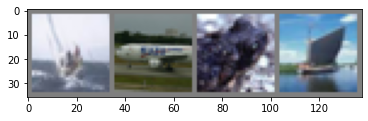

 ship plane  frog  ship


In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [13]:
import torch.optim as optmin

criterion = nn.CrossEntropyLoss()
optimizer = optmin.SGD(net.parameters(), lr=1e-4, momentum=.9) 

net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
for epoch in range(40):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.300
[1,  6000] loss: 2.295
[1,  8000] loss: 2.281
[1, 10000] loss: 2.240
[1, 12000] loss: 2.164
[2,  2000] loss: 2.056
[2,  4000] loss: 1.981
[2,  6000] loss: 1.934
[2,  8000] loss: 1.862
[2, 10000] loss: 1.825
[2, 12000] loss: 1.795
[3,  2000] loss: 1.749
[3,  4000] loss: 1.715
[3,  6000] loss: 1.680
[3,  8000] loss: 1.646
[3, 10000] loss: 1.620
[3, 12000] loss: 1.616
[4,  2000] loss: 1.587
[4,  4000] loss: 1.548
[4,  6000] loss: 1.535
[4,  8000] loss: 1.518
[4, 10000] loss: 1.503
[4, 12000] loss: 1.506
[5,  2000] loss: 1.465
[5,  4000] loss: 1.475
[5,  6000] loss: 1.465
[5,  8000] loss: 1.417
[5, 10000] loss: 1.418
[5, 12000] loss: 1.428
[6,  2000] loss: 1.392
[6,  4000] loss: 1.395
[6,  6000] loss: 1.393
[6,  8000] loss: 1.348
[6, 10000] loss: 1.365
[6, 12000] loss: 1.373
[7,  2000] loss: 1.333
[7,  4000] loss: 1.322
[7,  6000] loss: 1.314
[7,  8000] loss: 1.307
[7, 10000] loss: 1.309
[7, 12000] loss: 1.310
[8,  2000] loss: 1.283
[8,  4000] 

In [17]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

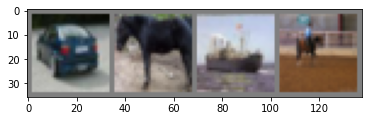

GroundTruth:    car horse  ship horse


In [18]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [19]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [20]:
outputs = net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    car horse  ship horse
